In [24]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor
import matplotlib.pyplot as plt

from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import datasets
import numpy as np
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import mlxtend
from sklearn.datasets import make_moons, make_circles
from sklearn.model_selection import train_test_split
!pip install mlxtend==0.19.0 --upgrade --no-deps
import mlxtend
import xgboost as xgb
from xgboost import XGBClassifier
!pip install catboost
from catboost import CatBoostClassifier, Pool
mlxtend.__version__

'0.19.0'

In [25]:
def make_sunny_moons(n_sun=50, n_moons=100, noise=0.0, sun_radius=1.9, theta=None):
    X_moons, y_moons = make_moons(n_samples=n_moons, noise=noise)
    if not n_sun:
        return X_moons, y_moons
    np.random.seed(0xBEEFBAD)
    angles = np.arange(0, 2 * np.pi, 2 * np.pi / n_sun)
    X_sun = sun_radius * np.column_stack([np.cos(angles), np.sin(angles)]) + np.array([0.5, 0.25])
    X_sun += np.random.normal(scale=noise, size=X_sun.shape)
    y_sun = 2 * np.ones(n_sun)
    X = np.vstack([X_moons, X_sun])
    y = np.concatenate([y_moons, y_sun]).astype(int)
    X -= X.mean(axis=0)
    if theta is None:
        theta = np.pi / 4
    c, s = np.cos(theta), np.sin(theta)
    R = np.array([[c, -s], [s, c]])
    X = X @ R
    return X, y


In [26]:
X, y = make_sunny_moons(n_sun=150, n_moons=300, noise=0.15)
X_train, X_test, y_train, y_test = train_test_split(X, y)


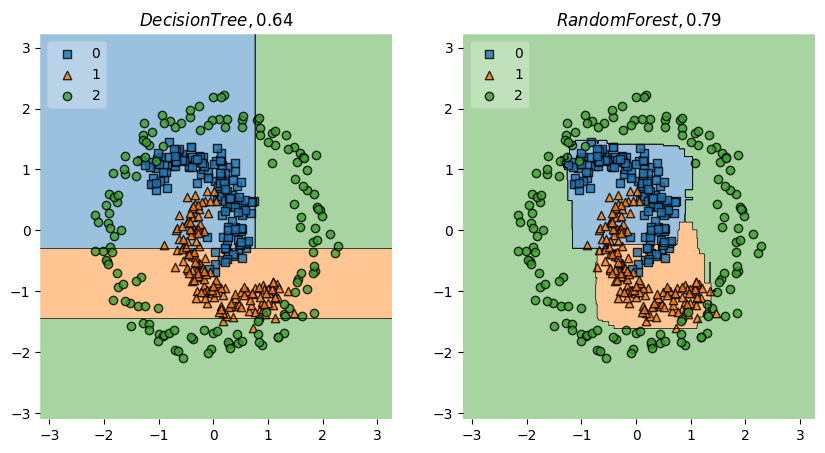

In [27]:
clf0 = tree.DecisionTreeClassifier(random_state=1, max_depth=2)
clf1 = RandomForestClassifier(random_state=1, n_estimators=100, max_depth=3)
gs = gridspec.GridSpec(1, 2)
fig = plt.figure(figsize=(10,5))
labels = ['Decision Tree ', 'Random Forest ']
for clf, lab, grd in zip([clf0, clf1],
                         labels,
                         itertools.product([0, 1], repeat=2)):
    clf.fit(X_train, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    a = accuracy_score(y_test, clf.predict(X_test))
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(r'${'+str(lab)+', ' + str('{:.2f}'.format(a))+'}$')


In [28]:
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 94.69%


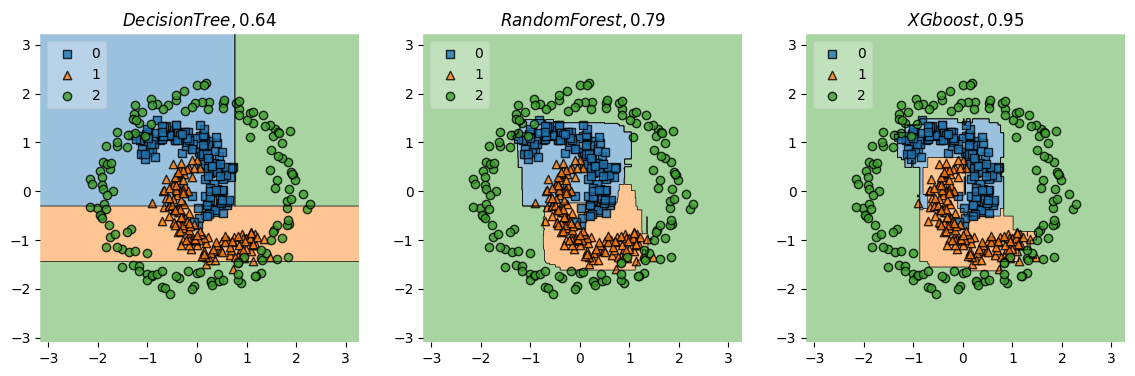

In [29]:
clf0 = tree.DecisionTreeClassifier(random_state=1, max_depth=2)
clf1 = RandomForestClassifier(random_state=1, n_estimators=100, max_depth=3)
clf2 = XGBClassifier()
gs = gridspec.GridSpec(1, 3)
fig = plt.figure(figsize=(14,4))
labels = ['Decision Tree ', 'Random Forest ', 'XGboost']
for clf, lab, grd in zip([clf0, clf1, clf2],
                         labels,
                         itertools.product([0, 1, 2], repeat=2)):
    clf.fit(X_train, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    a = accuracy_score(y_test, clf.predict(X_test))
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(r'${'+str(lab)+', ' + str('{:.2f}'.format(a))+'}$')


In [30]:
train_data = Pool(
    [
        [[0.1, 0.12, 0.33], [1.0, 0.7], 2, "male"],
        [[0.1, 0.12, 0.31], [1.0, 0.21], 2, "female"],
        [[0.2, 0.31, 0.1], [0.3, 0.11], 2, "female"],
        [[0.01, 0.2, 0.9], [0.62, 0.12], 1, "male"]  # обучающие данные для catboost
    ],
    label = [1, 0, 0, 1],
    cat_features=[3],
    embedding_features=[0, 1]
)

eval_data = Pool(
    [
        [[0.2, 0.1, 0.31], [1.2, 0.3], 1, "female"],
        [[0.33, 0.22, 0.4], [0.98, 0.5], 2, "female"],
        [[0.78, 0.29, 0.67], [0.76, 0.34], 2, "male"]
    ],  # тестирование
    label = [0, 1, 1],
    cat_features=[3],
    embedding_features=[0, 1]
)

model = CatBoostClassifier(iterations=10)
model.fit(train_data, eval_set=eval_data)
preds_class = model.predict(eval_data)


Learning rate set to 0.060065
0:	learn: 0.6885334	test: 0.6931472	best: 0.6931472 (0)	total: 256us	remaining: 2.31ms
1:	learn: 0.6839685	test: 0.6916247	best: 0.6916247 (1)	total: 377us	remaining: 1.51ms
2:	learn: 0.6775084	test: 0.6916177	best: 0.6916177 (2)	total: 474us	remaining: 1.11ms
3:	learn: 0.6730381	test: 0.6901162	best: 0.6901162 (3)	total: 566us	remaining: 849us
4:	learn: 0.6686118	test: 0.6886421	best: 0.6886421 (4)	total: 655us	remaining: 655us
5:	learn: 0.6642272	test: 0.6871951	best: 0.6871951 (5)	total: 745us	remaining: 496us
6:	learn: 0.6598792	test: 0.6842127	best: 0.6842127 (6)	total: 3.46ms	remaining: 1.48ms
7:	learn: 0.6555761	test: 0.6827990	best: 0.6827990 (7)	total: 3.56ms	remaining: 891us
8:	learn: 0.6513075	test: 0.6827990	best: 0.6827990 (7)	total: 3.71ms	remaining: 412us
9:	learn: 0.6452792	test: 0.6798707	best: 0.6798707 (9)	total: 3.81ms	remaining: 0us

bestTest = 0.6798707485
bestIteration = 9

